1. [Importing the Dependencies & feature engineering](#1)
    * [Creating Labels for the two class of Images](#2)
    * [Image Processing](#3)
1. [Training](#4)
    * [Train Test Split](#5)
    * [Building a Convolutional Neural Networks (CNN)](#6)
1. [Model Evaluation](#7)
1. [Building Predictive system](#8)
1. [*bonus* getting better test accuracy ](#9)
    

<a id = "1"></a><br>
# Importing the Dependencies

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image 
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
mask_files = os.listdir('/kaggle/input/face-mask-dataset/data/with_mask')
print(mask_files[0:5])
print(mask_files[-5:])

['with_mask_3326.jpg', 'with_mask_3139.jpg', 'with_mask_696.jpg', 'with_mask_2867.jpg', 'with_mask_39.jpg']
['with_mask_502.jpg', 'with_mask_110.jpg', 'with_mask_3205.jpg', 'with_mask_1863.jpg', 'with_mask_2020.jpg']


In [3]:
nomask_files = os.listdir('/kaggle/input/face-mask-dataset/data/without_mask')
print(nomask_files[0:5])
print(nomask_files[-5:])

['without_mask_3248.jpg', 'without_mask_2803.jpg', 'without_mask_650.jpg', 'without_mask_2060.jpg', 'without_mask_559.jpg']
['without_mask_3215.jpg', 'without_mask_2934.jpg', 'without_mask_2572.jpg', 'without_mask_1906.jpg', 'without_mask_2551.jpg']


In [4]:
print(f'Number of with mask images:{len(mask_files)}')
print(f'Number of without mask images:{len(nomask_files)}')

Number of with mask images:3725
Number of without mask images:3828


<a id = "2"></a><br>
## Creating Labels for the two class of Images

In [5]:
# create the labels

mask_files = [1]*3725
nomask_files = [0]*3828

In [6]:
print(mask_files[0:5]),print(nomask_files[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


(None, None)

In [7]:
print(len(mask_files)),print(len(nomask_files))

3725
3828


(None, None)

In [8]:
labels = mask_files + nomask_files
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


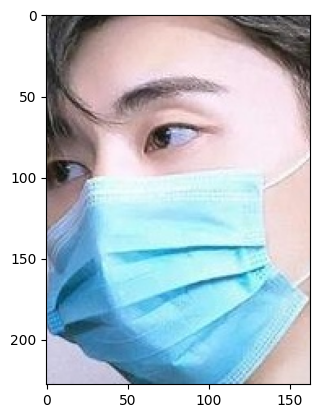

In [9]:
# display with mask image
img = mpimg.imread('/kaggle/input/face-mask-dataset/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

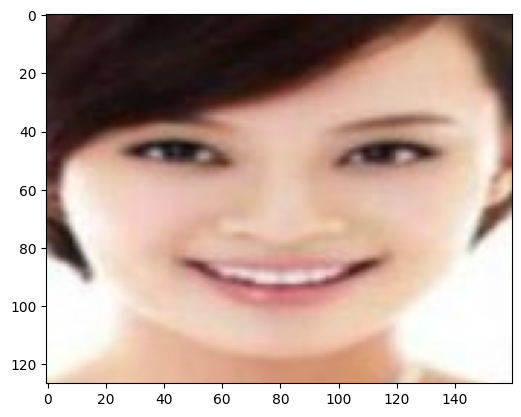

In [10]:
# displaying without mask image
img = mpimg.imread('/kaggle/input/face-mask-dataset/data/without_mask/without_mask_3215.jpg')
imgplot = plt.imshow(img)
plt.show()

<a id = "3"></a><br>
## Image Processing

In [11]:
with_mask_path = '/kaggle/input/face-mask-dataset/data/with_mask/'
mask_files = os.listdir(with_mask_path)

data = []

for img_file in mask_files:

  image = Image.open(with_mask_path + str(img_file))
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/kaggle/input/face-mask-dataset/data/without_mask/'
nomask_files = os.listdir(without_mask_path)

for img_file in nomask_files:

  image = Image.open(without_mask_path + str(img_file))
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [12]:
type(data),len(data)

(list, 7553)

In [13]:
data[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [254, 254, 254],
        [253, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [252, 253, 254],
        [246, 139, 136],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [212, 175, 154],
        [218, 187, 172],
        [250, 247, 245]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [212, 175, 154],
        [220, 191, 175],
        [252, 250, 248]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [211, 174, 155],
        [219, 194, 180],
        [252, 251, 250]]

In [14]:
type(data[0]),data[0].shape

(numpy.ndarray, (128, 128, 3))

In [15]:
# converting image list and label list to numpy arrays

x = np.array(data)
y = np.array(labels)

<a id = "4"></a><br>
# Training

<a id = "5"></a><br>
## Train Test Split

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
print(x.shape, x_train.shape, x_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [18]:
# scaling the data

x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [19]:
x_train[0],x_train_scaled[0]

(array([[[ 28,  27,  23],
         [ 28,  27,  23],
         [ 28,  27,  23],
         ...,
         [ 43,  43,  35],
         [ 43,  43,  35],
         [ 43,  43,  35]],
 
        [[ 30,  29,  25],
         [ 30,  29,  25],
         [ 30,  29,  25],
         ...,
         [ 43,  43,  35],
         [ 43,  43,  35],
         [ 43,  43,  35]],
 
        [[ 29,  28,  24],
         [ 29,  28,  24],
         [ 29,  28,  24],
         ...,
         [ 44,  44,  36],
         [ 44,  44,  36],
         [ 44,  44,  36]],
 
        ...,
 
        [[ 73,  41,  14],
         [ 70,  40,  15],
         [ 61,  35,  16],
         ...,
         [194, 189, 185],
         [193, 188, 184],
         [192, 187, 183]],
 
        [[ 79,  51,  27],
         [ 72,  44,  21],
         [ 61,  35,  17],
         ...,
         [193, 189, 185],
         [192, 188, 184],
         [192, 187, 183]],
 
        [[107,  91,  80],
         [ 87,  65,  51],
         [ 63,  39,  24],
         ...,
         [191, 188, 183],
  

<a id = "6"></a><br>
## Building a Convolutional Neural Networks (CNN)

In [20]:
import tensorflow as tf
from tensorflow import keras

In [21]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [22]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [23]:
# training the neural network
history = model.fit(x_train_scaled, y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 52s 300ms/step - loss: 0.4677 - acc: 0.7896 - val_loss: 0.2842 - val_acc: 0.8860
Epoch 2/5
170/170 [==============================] - 51s 298ms/step - loss: 0.2885 - acc: 0.8849 - val_loss: 0.2336 - val_acc: 0.8926
Epoch 3/5
170/170 [==============================] - 51s 298ms/step - loss: 0.2428 - acc: 0.9058 - val_loss: 0.2171 - val_acc: 0.9190
Epoch 4/5
170/170 [==============================] - 51s 298ms/step - loss: 0.2195 - acc: 0.9187 - val_loss: 0.1914 - val_acc: 0.9339
Epoch 5/5
170/170 [==============================] - 51s 299ms/step - loss: 0.1908 - acc: 0.9270 - val_loss: 0.2161 - val_acc: 0.9107


<a id = "7"></a><br>
# Model Evaluation

In [24]:
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 4s 76ms/step - loss: 0.2225 - acc: 0.9027
Test Accuracy = 0.902713418006897


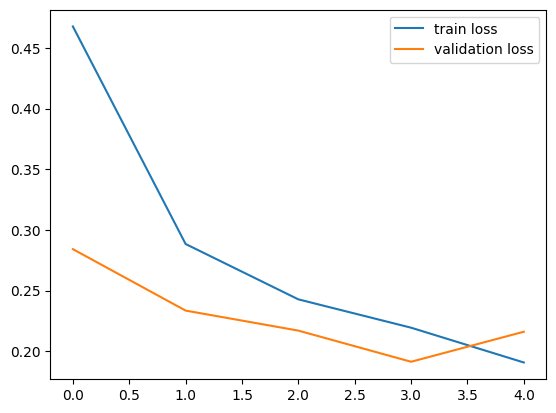

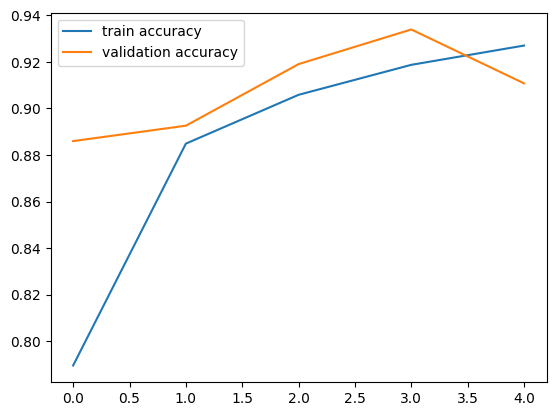

In [25]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

<a id = "8"></a><br>
# Predictive System

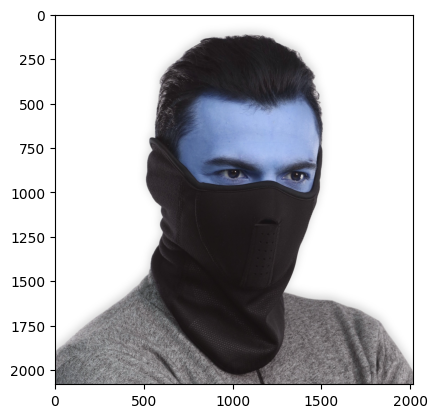

1/1 [==============================] - 0s 99ms/step
[[0.34929225 0.8121191 ]]
1
The person in the image is wearing a mask


In [26]:
# input_image_path = input('Path of the image to be predicted: ')
input_image_path = "/kaggle/input/face-mask-dataset/data/with_mask/with_mask_3204.jpg"
input_image = cv2.imread(input_image_path)

imgplot = plt.imshow(input_image)
plt.show()
input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

<a id = "9"></a><br>
# *bonus* getting better test accuracy 

In [27]:
import tensorflow as tf
import tensorflow_hub as hub

In [28]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(128, 128, 3), trainable=False)

In [29]:
import tensorflow as tf
import tensorflow_hub as hub

num_of_classes = 2

pretrained_model = hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/5")

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(128, 128, 3)),
    tf.keras.layers.Lambda(lambda x: tf.image.resize(x, (224, 224))),
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 224, 224, 3)       0         
                                                                 
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_3 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [30]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [31]:
model.fit(x_train_scaled, y_train, epochs=5)

Epoch 1/5
189/189 [==============================] - 76s 386ms/step - loss: 0.0697 - acc: 0.9777
Epoch 2/5
189/189 [==============================] - 72s 381ms/step - loss: 0.0233 - acc: 0.9926
Epoch 3/5
189/189 [==============================] - 73s 386ms/step - loss: 0.0159 - acc: 0.9955
Epoch 4/5
189/189 [==============================] - 73s 386ms/step - loss: 0.0120 - acc: 0.9970
Epoch 5/5
189/189 [==============================] - 73s 387ms/step - loss: 0.0092 - acc: 0.9980


In [32]:
score, acc = model.evaluate(x_test_scaled, y_test)
print(f'Test Loss ={score}')
print(f'Test Accuracy ={acc}')

48/48 [==============================] - 19s 378ms/step - loss: 0.0338 - acc: 0.9901
Test Loss =0.03384700417518616
Test Accuracy =0.9900727868080139
